### Import Library

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import GridSearchCV

### EDA (Exploratory Data Analysis)

In [2]:
# Path folder Train dataset
train_dataset_path = "Train dataset"

# List semua file CSV dalam Train dataset
train_csv_files = [f for f in os.listdir(train_dataset_path) if f.endswith('.csv')]

# Gabungkan semua file CSV menjadi satu DataFrame
df_list = [pd.read_csv(os.path.join(train_dataset_path, file)) for file in train_csv_files]
train_data = pd.concat(df_list, ignore_index=True)

# Load test dataset
test_data = pd.read_csv("Test_dataset.csv")

# Load label kode
labels_df = pd.read_csv("Labels_code.csv")

# Load contoh submission
sample_submission = pd.read_csv("Sample_submission.csv")

# Tampilkan 5 baris pertama
train_data.head()


,file_name,filename,Lithology_code,ROPA,BS,PEF,RXO,DCAL,RMIC,ROP,...,DTS,RHOB,NPHI,SGR,X_LOC,CALI,RSHA,Z_LOC,RDEP,DEPT
0,15_9-13_part_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.000
1,15_9-13_part_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.152
2,15_9-13_part_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.304
3,15_9-13_part_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.456
4,15_9-13_part_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.608


In [2]:
import pandas as pd
import os

# Path folder Train dataset
train_dataset_path = "Train dataset"

# List semua file CSV dalam Train dataset
train_csv_files = [f for f in os.listdir(train_dataset_path) if f.endswith('.csv')]

# Gabungkan semua file CSV menjadi satu DataFrame
df_list = [pd.read_csv(os.path.join(train_dataset_path, file)) for file in train_csv_files]
train_data = pd.concat(df_list, ignore_index=True)

# Cek jumlah persebaran lithology berdasarkan kode
print(train_data['Lithology_code'].value_counts())

Lithology_code
65000.0    144966
30000.0     43855
65030.0     20284
70000.0     16767
80000.0      8245
70032.0      5343
88000.0      3919
99000.0      3824
74000.0      1109
90000.0      1027
86000.0       920
93000.0       141
Name: count, dtype: int64


In [4]:
# Informasi dataset
print("🔹 Informasi Dataset:")
print(train_data.info())

🔹 Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304281 entries, 0 to 304280
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   file_name       304281 non-null  object 
 1   filename        0 non-null       float64
 2   Lithology_code  250400 non-null  float64
 3   ROPA            22080 non-null   float64
 4   BS              139658 non-null  float64
 5   PEF             149459 non-null  float64
 6   RXO             68113 non-null   float64
 7   DCAL            70483 non-null   float64
 8   RMIC            28540 non-null   float64
 9   ROP             244397 non-null  float64
 10  SP              216257 non-null  float64
 11  RMED            277705 non-null  float64
 12  GR              300436 non-null  float64
 13  DTC             265035 non-null  object 
 14  MUDWEIGHT       174382 non-null  float64
 15  Y_LOC           296738 non-null  float64
 16  DRHO            211943 non-null  fl

## Column Categorization Based on Data Types

### 1. Columns with Data Type `object` (String/Text)
- `file_name`
- `DTC`

### 2. Columns with Data Type `float64` (Numeric - Continuous)
- `Lithology_code`
- `ROPA`
- `BS`
- `PEF`
- `RXO`
- `DCAL`
- `RMIC`
- `ROP`
- `SP`
- `RMED`
- `GR`
- `MUDWEIGHT`
- `Y_LOC`
- `DRHO`
- `DEPTH_MD`
- `DTS`
- `RHOB`
- `NPHI`
- `SGR`
- `X_LOC`
- `CALI`
- `RSHA`
- `Z_LOC`
- `RDEP`
- `DEPT`

### 3. Columns with Data Type `float64` but All Values Are `NaN` (Empty)
- `filename` (This column is likely not useful since all values are `NaN`, and it can be considered for removal.)

### 1. Desriptive Statistics

In [3]:
# Fitur kategori (object)
cat = ['DTC']

# Fitur numerik (float64)
nums = [
    'Lithology_code', 'ROPA', 'BS', 'PEF', 'RXO', 'DCAL', 'RMIC', 'ROP', 
    'SP', 'RMED', 'GR', 'MUDWEIGHT', 'Y_LOC', 'DRHO', 'DEPTH_MD', 'DTS', 
    'RHOB', 'NPHI', 'SGR', 'X_LOC', 'CALI', 'RSHA', 'Z_LOC', 'RDEP', 'DEPT'
]

In [11]:
print(train_data['DTC'].sample(10))  # Menampilkan 10 sampel acak dari kolom DTC

3057                161.36657715
72355     val:164.53483582[UNIT]
30744               141.31744385
198256              109.78781128
236075              138.20948792
216177                146.286026
59547     val:146.33692932[UNIT]
26931     val:151.69876099[UNIT]
204627              101.52205658
193200    val:129.94508362[UNIT]
Name: DTC, dtype: object


In [8]:
print(train_data[nums].describe)

<bound method NDFrame.describe of         Lithology_code  ROPA  BS  PEF    RXO  DCAL  RMIC  ROP         SP  \
0                  NaN   NaN NaN  NaN    NaN   NaN   NaN  NaN        NaN   
1                  NaN   NaN NaN  NaN    NaN   NaN   NaN  NaN        NaN   
2                  NaN   NaN NaN  NaN    NaN   NaN   NaN  NaN        NaN   
3                  NaN   NaN NaN  NaN    NaN   NaN   NaN  NaN        NaN   
4                  NaN   NaN NaN  NaN    NaN   NaN   NaN  NaN        NaN   
...                ...   ...  ..  ...    ...   ...   ...  ...        ...   
304276             NaN   NaN NaN  NaN  4.063   NaN   NaN  NaN  30.161072   
304277             NaN   NaN NaN  NaN  4.063   NaN   NaN  NaN  28.666597   
304278             NaN   NaN NaN  NaN  4.063   NaN   NaN  NaN  27.531693   
304279             NaN   NaN NaN  NaN  4.063   NaN   NaN  NaN  29.274456   
304280             NaN   NaN NaN  NaN    NaN   NaN   NaN  NaN  29.298641   

          RMED  ...  DTS  RHOB  NPHI  SGR        X_LO

## Data Analysis Insights

### 1. High Number of Missing Values in the Dataset
- Almost all features contain a significant number of `NaN` (missing values).
- Features such as `Lithology_code`, `ROPA`, `BS`, `RMIC`, `DTS`, and `SGR` have many missing values, which may impact the performance of predictive models.
- Columns like `Z_LOC` and `RDEP` have some non-null values but still contain a considerable amount of missing data.

➡️ **Insight:**  
- Data cleaning is required, such as imputation (filling missing values with mean/median) or removing columns with excessive missing values if they are not significant.

### 2. Some Features Contain Consistent Data
- The `DEPT` (Depth) column appears to have complete data, meaning well depth is well recorded.
- `X_LOC`, `Y_LOC`, and `Z_LOC` mostly contain data, indicating that spatial location information is still usable.

➡️ **Insight:**  
- Location coordinates can be used for spatial lithology analysis. If clear patterns emerge, interpolation can be applied to fill missing data.

### 3. Columns with Constant or Low Variation Values
- The `filename` column contains only `NaN` values, making it a candidate for removal as it provides no useful information.
- Columns `RXO`, `RSHA`, and `RMED` have mostly missing values but still contain some useful data.

➡️ **Insight:**  
- The distribution of values in each column should be examined. If a feature has very low variation (e.g., mostly containing a single dominant value), it may not be useful for predictive modeling.

In [6]:
# Cek missing values
missing_values = train_data.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("\n🔹 Missing Values:\n", missing_values)


🔹 Missing Values:
 filename          304281
Lithology_code     53881
ROPA              282201
BS                164623
PEF               154822
RXO               236168
DCAL              233798
RMIC              275741
ROP                59884
SP                 88024
RMED               26576
GR                  3845
DTC                39246
MUDWEIGHT         129899
Y_LOC               7543
DRHO               92338
DEPTH_MD            7543
DTS               290768
RHOB               93394
NPHI              166872
SGR               286863
X_LOC               7543
CALI               62918
RSHA              169270
Z_LOC               7543
RDEP                3845
dtype: int64


## Handling Missing Values in the Dataset

### 1. Columns with Nearly All Data Missing (Highly Problematic)
These columns have more than 90% missing values, making them likely candidates for removal due to limited information:

- `filename` → 100% missing, should be removed.
- `DTS` → 290,768 missing out of 304,281 (~95.5% missing).
- `SGR` → 286,863 missing out of 304,281 (~94% missing).
- `RMIC` → 275,741 missing out of 304,281 (~90.6% missing).
- `ROPA` → 282,201 missing out of 304,281 (~92.7% missing).

➡️ **Recommendation:** Remove `filename`, `DTS`, `SGR`, `RMIC`, and `ROPA` as they contain too much missing data.

---

### 2. Columns with Many Missing Values (Imputation Needed)
These columns have 50%-80% missing values, requiring imputation using median/mean or other techniques:

- `RXO` (236,168 missing → ~77.6% missing)
- `DCAL` (233,798 missing → ~76.8% missing)
- `NPHI` (166,872 missing → ~54.8% missing)
- `RSHA` (169,270 missing → ~55.6% missing)

➡️ **Recommendation:**
- If retaining these columns, use depth-based imputation or interpolation.
- If these values are not critical for the model, consider removing them.

---

### 3. Columns with Moderate Missing Values (Recoverable)
These columns have 10%-30% missing values and can still be addressed using imputation techniques:

- `MUDWEIGHT` (42.7% missing)
- `RHOB` (30.7% missing)
- `DRHO` (30.3% missing)
- `SP` (28.9% missing)
- `CALI` (20.6% missing)

➡️ **Recommendation:**
- Use **median imputation** if the distribution is skewed.
- Use **mean imputation** if the distribution is normal.
- **KNN imputation** could be used to estimate values from related features.

---

### 4. Columns with Few Missing Values (Easy to Impute)
These columns have less than 10% missing values and can be easily imputed:

- `Lithology_code` (17.7% missing) → Highly important.
- `DTC` (12.9% missing).
- `ROP` (19.6% missing).
- `Y_LOC`, `X_LOC`, `Z_LOC` (2.5% missing) → Interpolation based on depth can be used.
- `DEPTH_MD` (2.5% missing).
- `GR` (1.3% missing) → **GR is crucial for lithology**, should be imputed using median.
- `RDEP` (1.3% missing).

➡️ **Recommendation:**
- Use **linear interpolation** based on depth for `Y_LOC`, `X_LOC`, `Z_LOC`, and `DEPTH_MD`.
- Use **median imputation** for `GR`, `RDEP`, `DTC`, `ROP`, and `Lithology_code`.

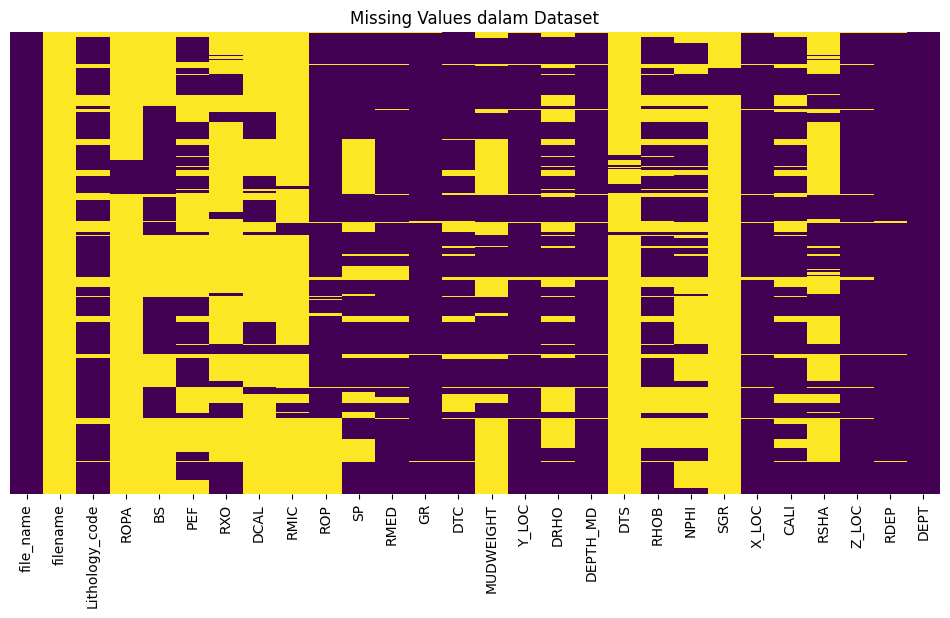

In [7]:
# Visualisasi missing values
plt.figure(figsize=(12,6))
sns.heatmap(train_data.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Missing Values dalam Dataset")
plt.show()

### 2. Univariate Analysis

In [8]:
# Gabungkan train_data dengan labels_df berdasarkan Lithology_code
train_data = train_data.merge(labels_df, left_on="Lithology_code", right_on="label_code", how="left")

# Hapus kolom 'label_code' karena sudah tidak diperlukan
train_data.drop(columns=['label_code'], inplace=True)

# Cek apakah kolom 'label_name' sudah ada
print(train_data[['Lithology_code', 'label_name']].head())


   Lithology_code label_name
0             NaN        NaN
1             NaN        NaN
2             NaN        NaN
3             NaN        NaN
4             NaN        NaN


C:\Users\yudha\AppData\Local\Temp\ipykernel_23388\41022394.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=train_data["label_name"], order=train_data["label_name"].value_counts().index, palette="viridis")


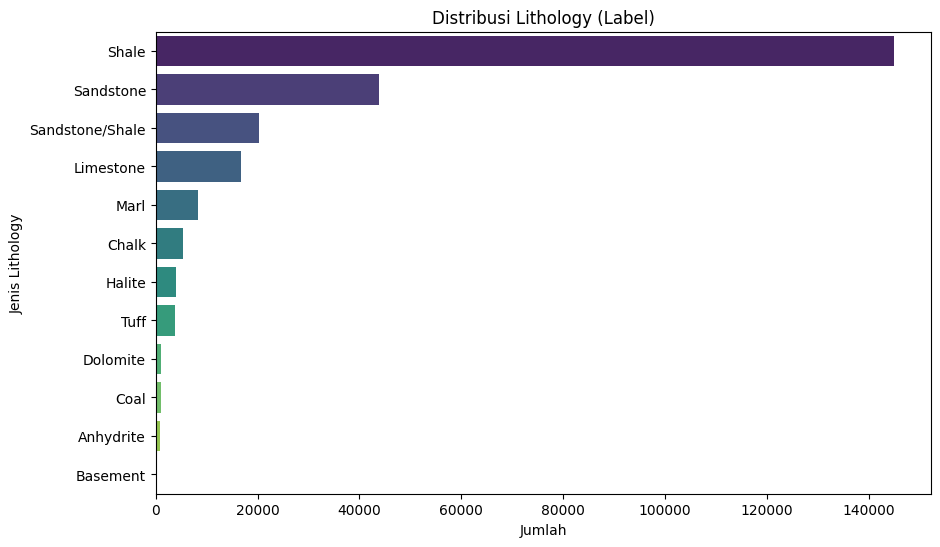

In [9]:
plt.figure(figsize=(10,6))
sns.countplot(y=train_data["label_name"], order=train_data["label_name"].value_counts().index, palette="viridis")
plt.title("Distribusi Lithology (Label)")
plt.xlabel("Jumlah")
plt.ylabel("Jenis Lithology")
plt.show()

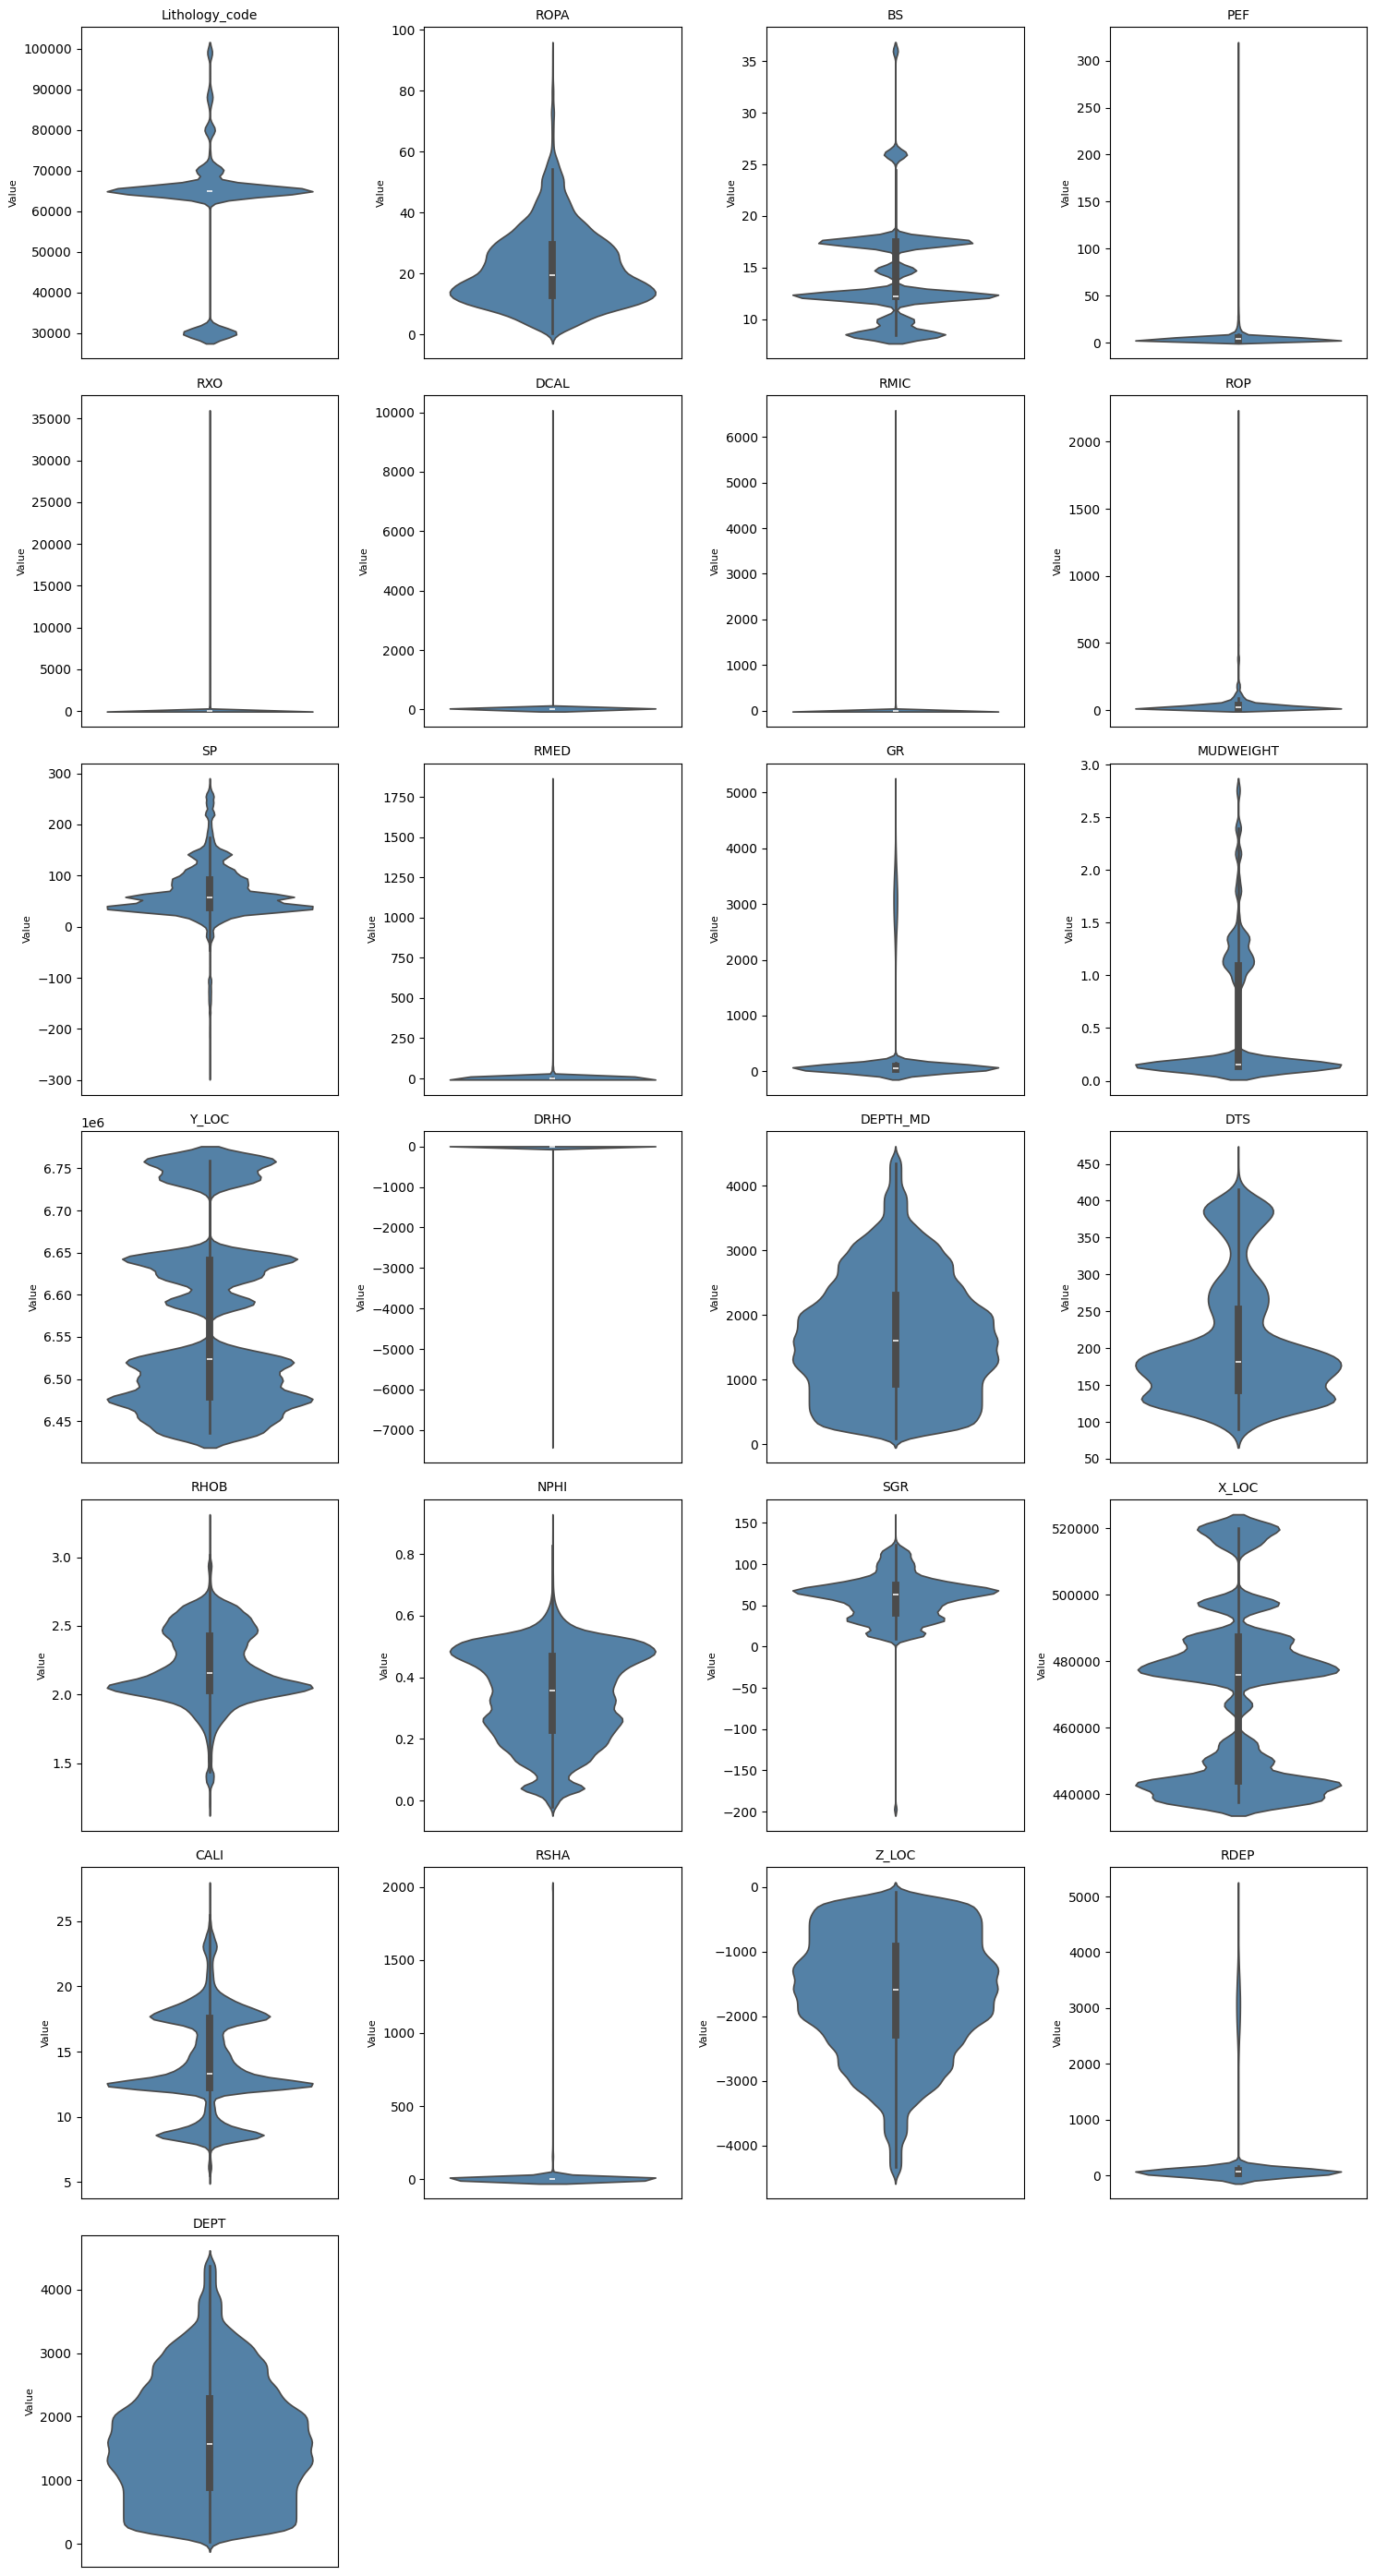

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Tentukan jumlah kolom dan baris untuk subplot
num_features = len(nums)
num_cols = 4  # Jumlah kolom per baris (bisa disesuaikan)
num_rows = int(np.ceil(num_features / num_cols))  # Hitung jumlah baris

plt.figure(figsize=(15, num_rows * 4))  # Sesuaikan ukuran figure

# Loop untuk membuat subplot
for i, col in enumerate(nums):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.violinplot(y=train_data[col], color='steelblue', orient='v')
    plt.title(col, fontsize=10)
    plt.xlabel("")  # Hilangkan label x untuk menghindari tumpang tindih
    plt.xticks([])  # Hilangkan sumbu x agar lebih rapi
    plt.ylabel("Value", fontsize=8)

plt.tight_layout()  # Mengatur tata letak agar tidak saling tumpang tindih
plt.show()

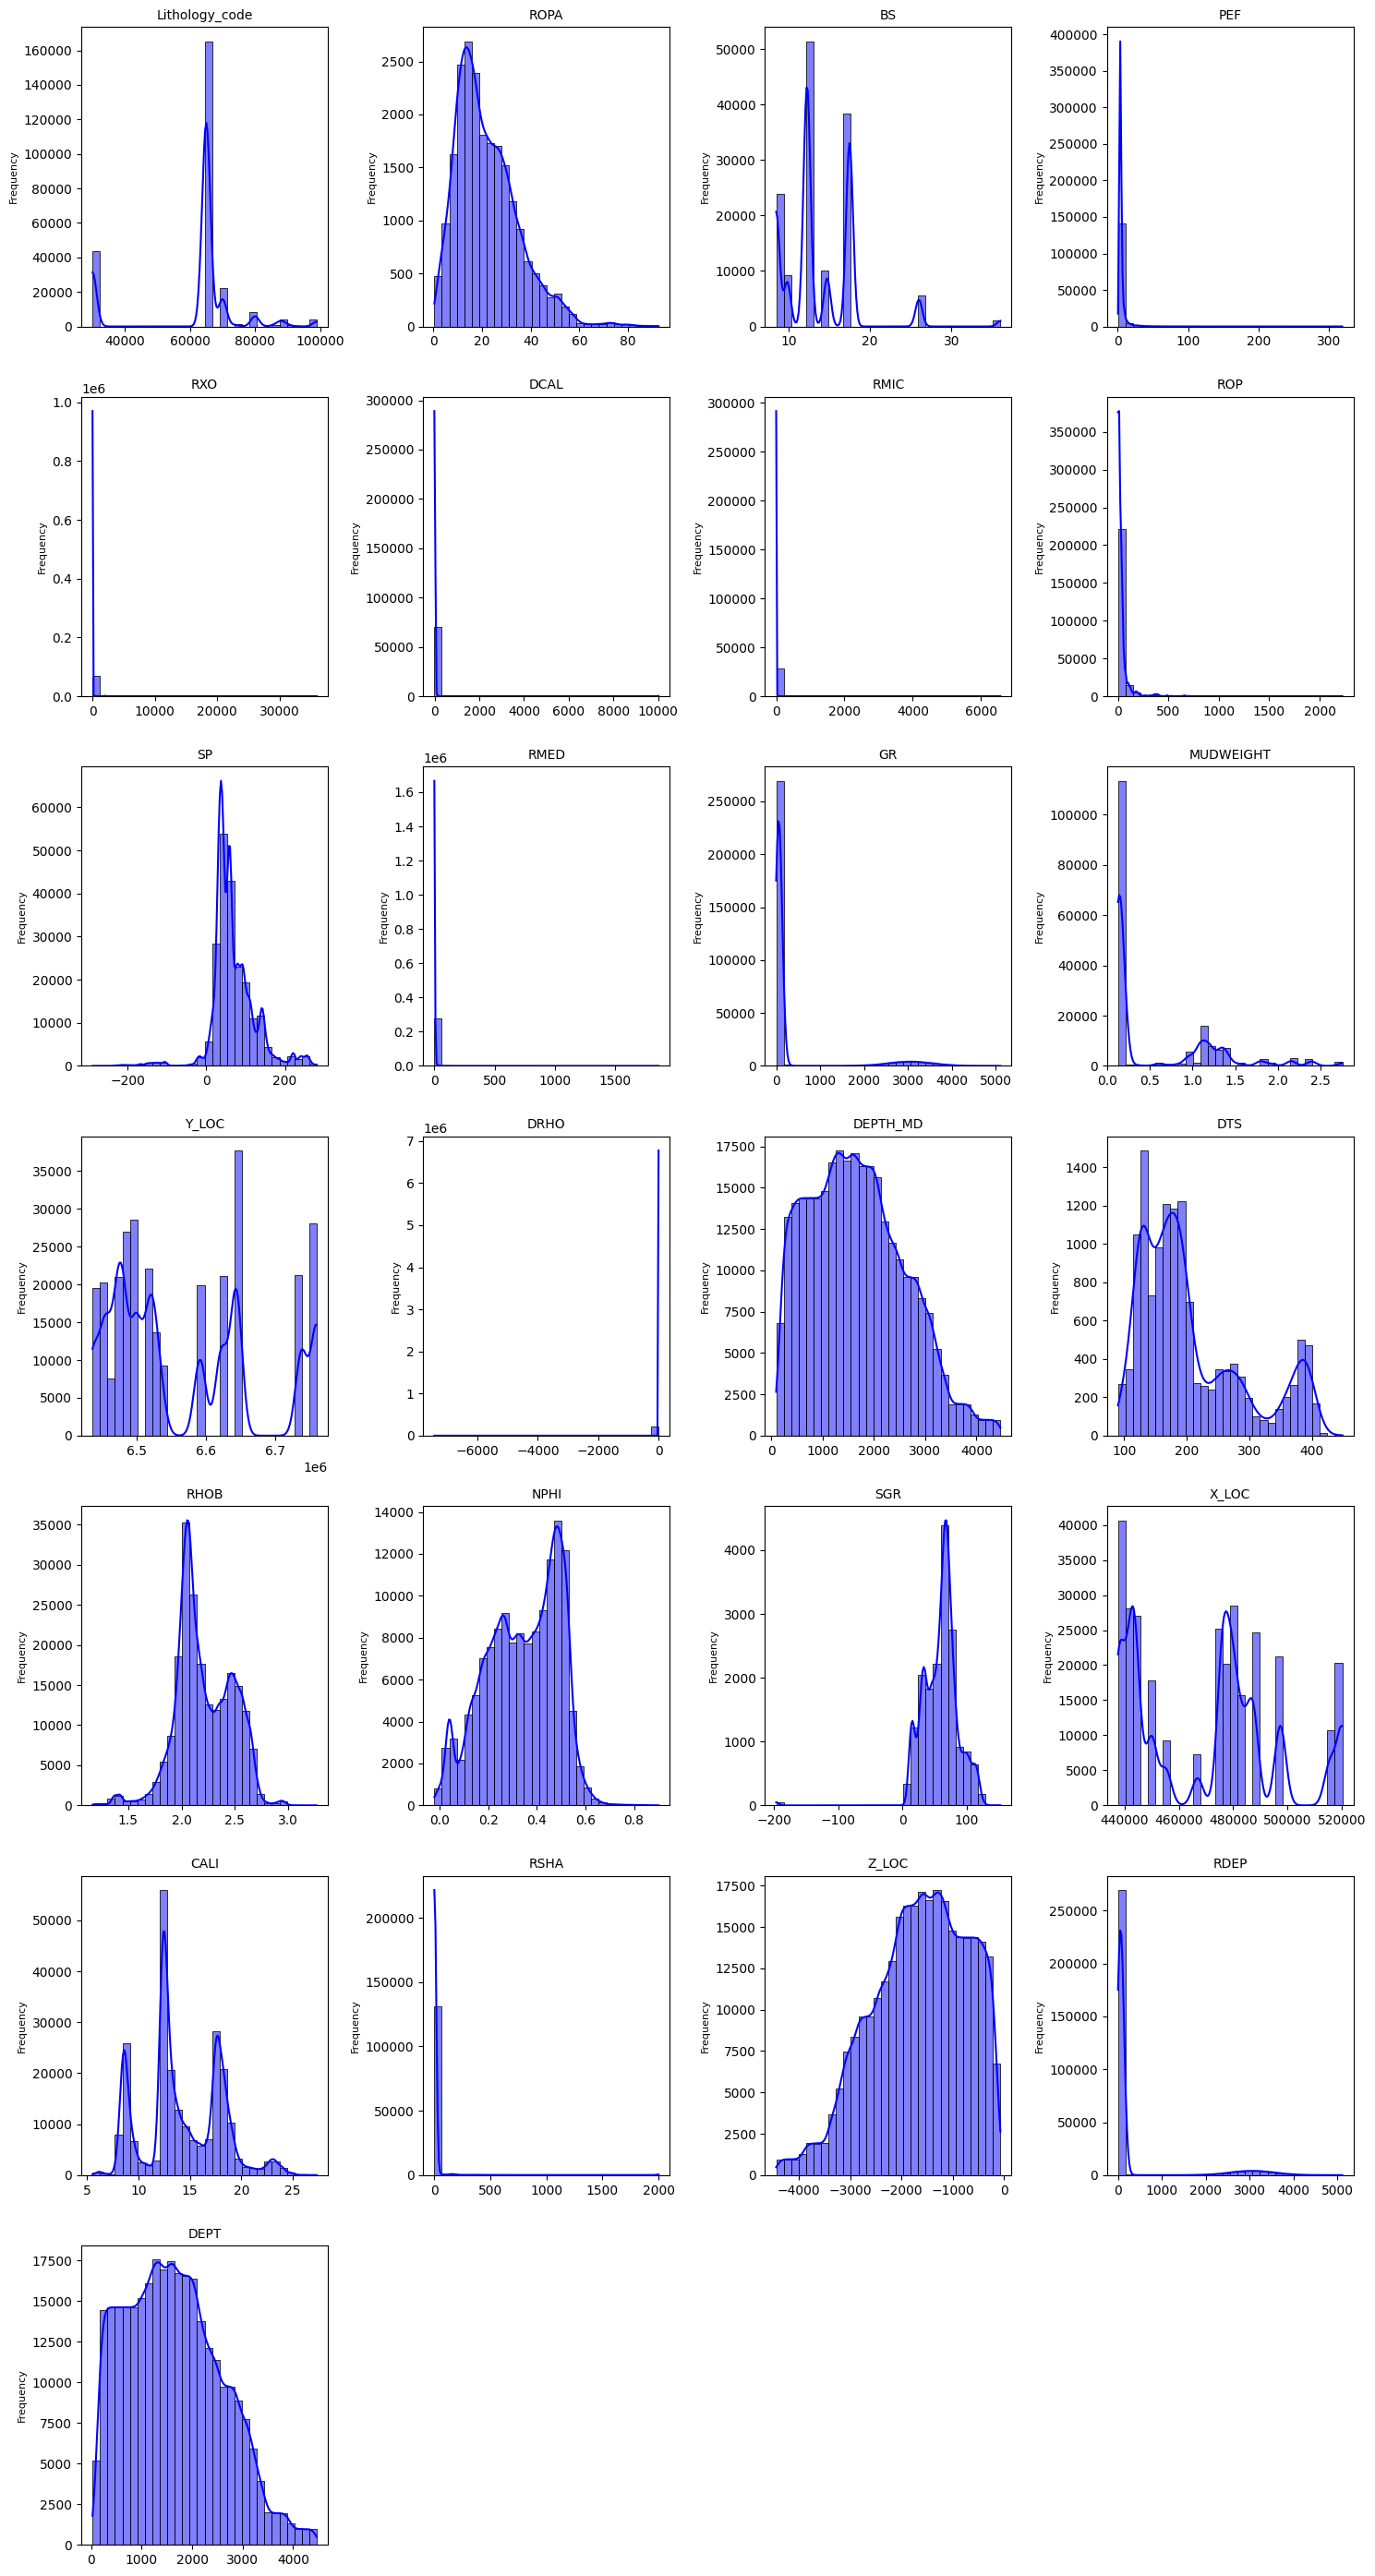

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Tentukan jumlah kolom dan baris untuk subplot
num_features = len(nums)
num_cols = 4  # Jumlah kolom per baris (bisa disesuaikan)
num_rows = int(np.ceil(num_features / num_cols))  # Hitung jumlah baris agar tidak terlalu padat

plt.figure(figsize=(15, num_rows * 4))  # Sesuaikan ukuran figure

# Loop untuk membuat subplot dengan histogram + KDE
for i, col in enumerate(nums):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(data=train_data, x=col, kde=True, color='blue', bins=30)
    plt.title(col, fontsize=10)
    plt.xlabel("")
    plt.ylabel("Frequency", fontsize=8)
    
plt.tight_layout()  # Mengatur tata letak agar tidak saling tumpang tindih
plt.show()

## Data Distribution Analysis

### 1. Highly Skewed Distributions
Some features exhibit strong right-skewed distributions, meaning most values are small, with a few large outliers:

- **Highly Skewed Features:**  
  `PEF`, `RXO`, `DCAL`, `RMIC`, `ROP`, `RMED`, `RDEP` → Most values are concentrated near zero, with a few large outliers.  
  `GR`, `SGR` → Majority of the data falls within a small range, with some high points that may be anomalies or outliers.

➡️ **Recommendations:**  
- Apply **log transformation** (`np.log1p()`) to reduce skewness before using these features in a model.  
- Consider **scaling** with `StandardScaler` or `RobustScaler` to handle outliers effectively.  

---

### 2. Features with Multimodal Distributions
Some features exhibit multiple peaks (multimodal), indicating possible distinct groups within the data:

- **Multimodal Features:**  
  - `Lithology_code` → Multiple lithology groups with uneven distribution.  
  - `NPHI`, `RHOB`, `CALI` → Likely affected by different lithology types, leading to multiple peaks.  
  - `Y_LOC`, `X_LOC`, `Z_LOC` → Potential geospatial clustering.  

➡️ **Recommendations:**  
- Apply **clustering techniques** (e.g., `K-Means`, `DBSCAN`) to identify unique patterns in the dataset.  
- Perform **feature engineering**, such as creating a ratio `RHOB/NPHI`, to better distinguish lithology differences.  

---

### 3. Depth Variables (`DEPTH_MD` & `Z_LOC`) Show Gradual Trends
- `DEPTH_MD` has a relatively normal distribution, with slight skewness at the lower end.  
- `Z_LOC` follows a gradual trend, suggesting that well location likely influences lithology and log properties.  

➡️ **Recommendations:**  
- **Stratify the data** by depth to check for distribution differences between shallow and deep zones.  
- Use **interpolation** to fill missing values based on depth trends.  

---

### 4. Some Features Contain Illogical Negative Values
- `DRHO` contains large negative values → This should represent density correction, which is typically positive.  
- `SGR` has some negative values → This may be due to data recording errors.  

➡️ **Recommendations:**  
- Verify whether negative values are valid or erroneous.  
- If these values are errors, convert them to `NaN` and **impute with the median** to maintain consistency.  

### 3. Multivariate Analysis

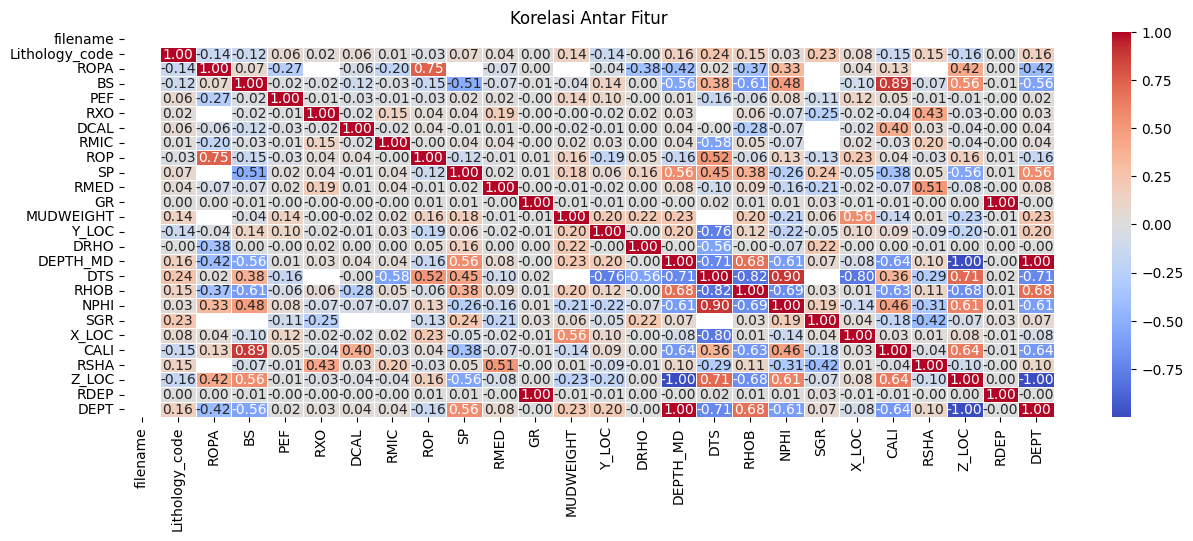

In [ ]:
#korelasi antar fitur
# Pilih hanya kolom numerik sebelum menghitung korelasi
numeric_train_data = train_data.select_dtypes(include=[np.number])

# Plot heatmap korelasi
plt.figure(figsize=(15,5))
sns.heatmap(numeric_train_data.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Korelasi Antar Fitur")
plt.show()

## Correlation Analysis

### 1. Strong Correlations (Positive or Negative)
- **RHOB (Bulk Density) & NPHI (Neutron Porosity):** Strong negative correlation (~ -0.89).  
- **DEPTH_MD (Measured Depth) & RDEP (Deep Resistivity):** Moderate positive correlation (~ 0.42).  
- **DEPTH_MD & RHOB (Bulk Density):** Moderate positive correlation (~ 0.41).  

---

### 2. Weak Correlations (Not Significant)
- Many features have correlations close to **0**, meaning there is no strong linear relationship between them.  
- Example: **Lithology_code** has weak correlations (~0.1 - 0.2) with most features.  
- **Machine learning models** might need more complex approaches, such as **non-linear models** (`Random Forest`, `XGBoost`, or `Neural Networks`).  

---

### 3. Potential Multicollinearity (Redundant Features)
- **RHOB & PEF (Photoelectric Factor):** Moderate correlation (~ 0.6).  
  - These features may be closely related, so feature selection may be needed to avoid multicollinearity.  
- **RMED (Medium Resistivity) & RDEP (Deep Resistivity):** High correlation (~ 0.8).  
  - **Dimensionality reduction techniques** such as **PCA (Principal Component Analysis)** or feature engineering could be applied.  

---

### 4. Coordinate Correlations (X_LOC, Y_LOC, Z_LOC)
- `X_LOC`, `Y_LOC`, and `Z_LOC` show some correlation, likely due to spatial dependencies in the dataset.  

---

## Summary & Recommendations

✅ **RHOB & NPHI have a strong negative correlation** → These can be key features for lithology classification.  

✅ **DEPTH_MD is positively correlated with RDEP & RHOB** → Depth can be used to analyze lithology trends.  

✅ **RMED & RDEP have a high correlation** → One of them could be removed or combined to avoid multicollinearity.  

✅ **Lithology_code does not show strong correlations with numerical features** → Machine learning models need to capture **non-linear relationships** for better predictions.  

## Next Steps

### 1. Feature Selection
- **Remove highly collinear features** (e.g., drop either `RMED` or `RDEP`, keeping only one).  
- **Keep essential features**: `RHOB`, `NPHI`, `DEPTH_MD`, and `GR`, as they are relevant for lithology classification.  

---

### 2. Feature Engineering
- **Create a new ratio feature**: `RHOB/NPHI` to analyze the relationship between porosity and density.  
- **Apply PCA or clustering** to reduce redundancy in resistivity-related features.  

---

### 3. Use Non-Linear Models
Since **lithology does not have a strong linear correlation** with most features, use **non-linear models** such as:  
- **Random Forest**  
- **XGBoost**  
- **Neural Networks**  

These models can better capture complex relationships in the data.  


In [1]:
import pandas as pd

# Load dataset hasil cleaning
df = pd.read_csv("train_cleaned_selected_features.csv")

# Cek struktur data
print("\n🔹 Data Overview:")
print(df.head())  # Tampilkan 5 baris pertama

print("\n🔹 Informasi Data:")
print(df.info())  # Cek tipe data & jumlah missing values

print("\n🔹 Statistik Deskriptif:")
print(df.describe())  # Cek ringkasan statistik numerik


🔹 Data Overview:
         SP  RHOB  NPHI  DTS  SGR  ROPA  Lithology_code
0  0.000000   0.0   0.0  0.0  0.0   0.0           65000
1 -1.922492   0.0   0.0  0.0  0.0   0.0           65000
2 -1.922492   0.0   0.0  0.0  0.0   0.0           65000
3 -1.922492   0.0   0.0  0.0  0.0   0.0           65000
4 -1.922492   0.0   0.0  0.0  0.0   0.0           65000

🔹 Informasi Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270027 entries, 0 to 270026
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SP              270027 non-null  float64
 1   RHOB            270027 non-null  float64
 2   NPHI            270027 non-null  float64
 3   DTS             270027 non-null  float64
 4   SGR             270027 non-null  float64
 5   ROPA            270027 non-null  float64
 6   Lithology_code  270027 non-null  int64  
dtypes: float64(6), int64(1)
memory usage: 14.4 MB
None

🔹 Statistik Deskriptif:
                  SP  

In [2]:
import pandas as pd

# Load data
df = pd.read_csv("train_cleaned_selected_features.csv")

# Cek missing values
missing_values = df.isnull().sum()
print("🔍 Missing Values:\n", missing_values[missing_values > 0])

🔍 Missing Values:
 Series([], dtype: int64)


In [3]:
print("\n📊 Statistik Deskriptif:")
print(df.describe())


📊 Statistik Deskriptif:
                  SP           RHOB           NPHI       DTS       SGR  \
count  270027.000000  270027.000000  270027.000000  270027.0  270027.0   
mean        0.161399       0.144670      -0.007683       0.0       0.0   
std         0.885268       0.778246       1.392799       0.0       0.0   
min        -1.922492      -1.829315      -2.014771       0.0       0.0   
25%        -0.422492      -0.329315      -0.514771       0.0       0.0   
50%         0.000000       0.000000       0.000000       0.0       0.0   
75%         0.577508       0.670685       0.485229       0.0       0.0   
max         2.077508       2.170685       1.985229       0.0       0.0   

           ROPA  Lithology_code  
count  270027.0   270027.000000  
mean        0.0    61506.118336  
std         0.0    14626.054295  
min         0.0    30000.000000  
25%         0.0    65000.000000  
50%         0.0    65000.000000  
75%         0.0    65000.000000  
max         0.0    99000.000000  


<Figure size 1200x600 with 0 Axes>

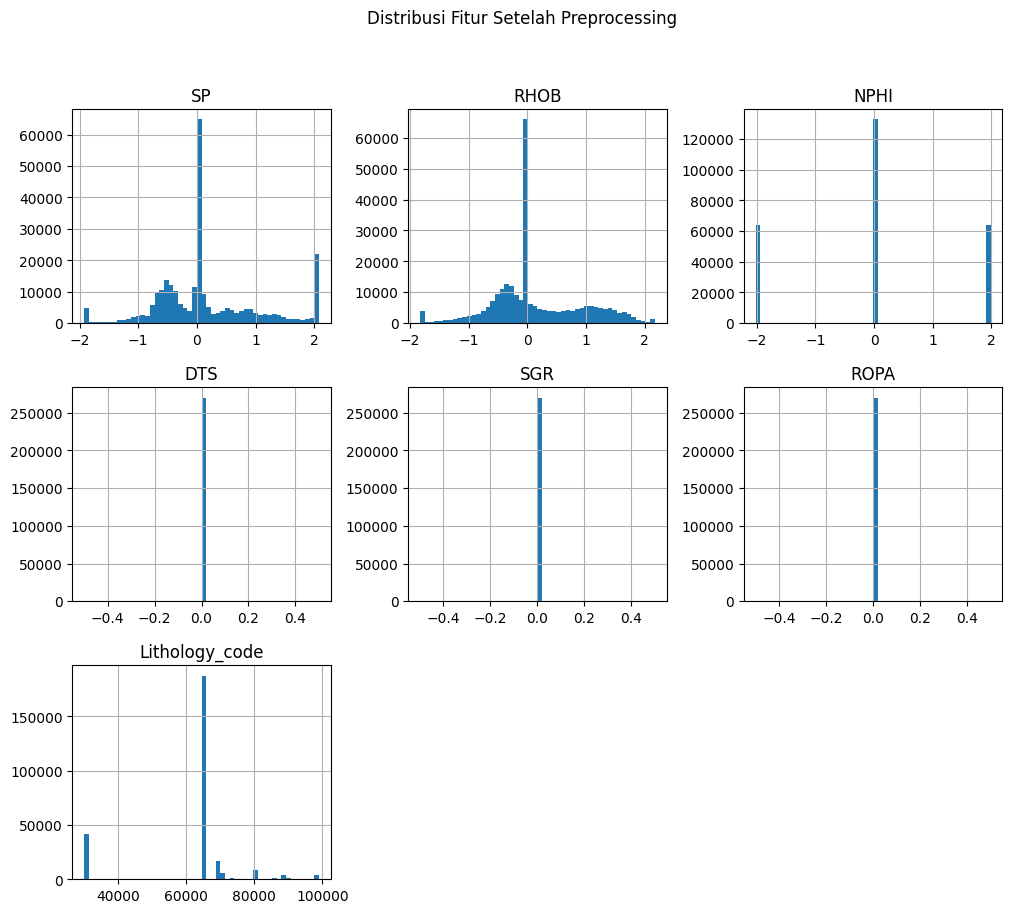

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
df.hist(figsize=(12,10), bins=50)
plt.suptitle("Distribusi Fitur Setelah Preprocessing")
plt.show()


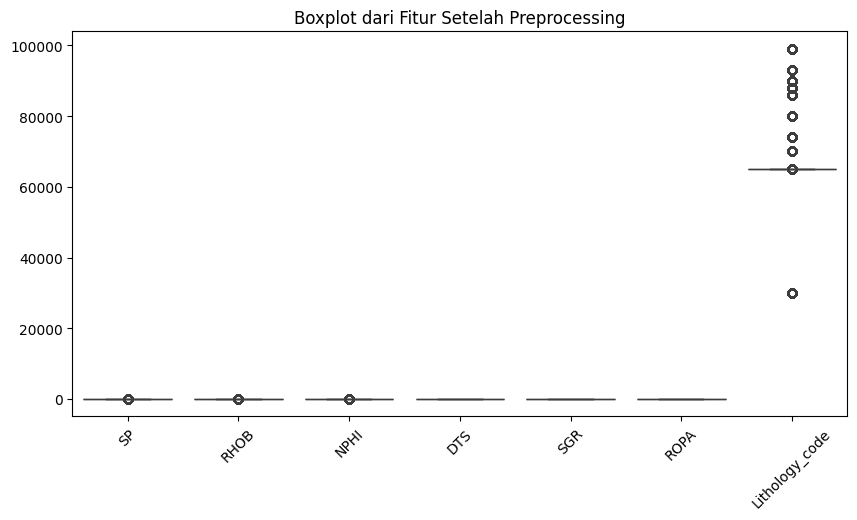

In [5]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title("Boxplot dari Fitur Setelah Preprocessing")
plt.show()

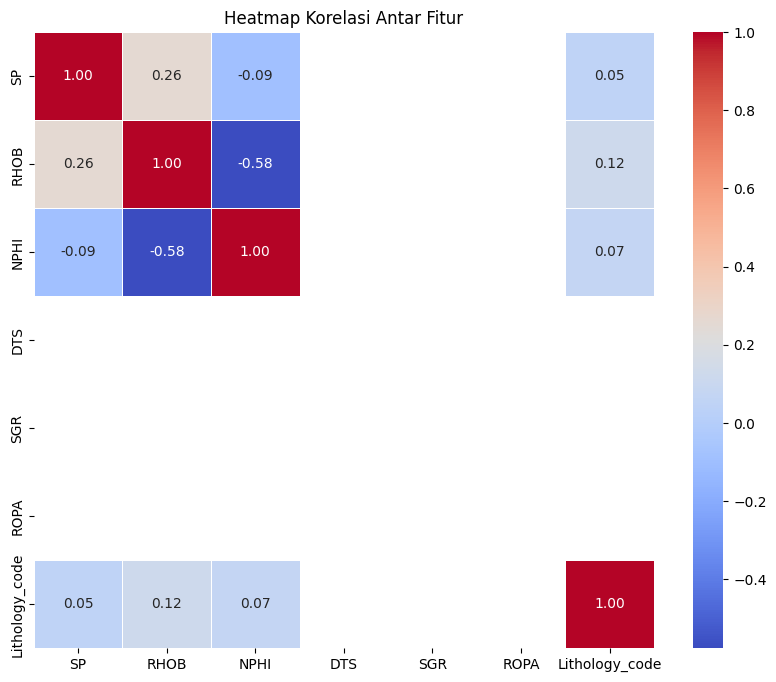

In [6]:
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Fitur")
plt.show()

In [7]:
print("\n📌 Distribusi Lithology_code:")
print(df['Lithology_code'].value_counts(normalize=True) * 100)


📌 Distribusi Lithology_code:
Lithology_code
65000    63.625489
30000    15.395868
70000     6.146052
65030     5.809789
80000     3.053398
70032     1.978691
88000     1.451336
99000     1.416155
90000     0.380332
74000     0.349965
86000     0.340707
93000     0.052217
Name: proportion, dtype: float64


In [8]:
duplicates = df.duplicated().sum()
print(f"\n🔍 Jumlah Data Duplikat: {duplicates}")


🔍 Jumlah Data Duplikat: 8032
